Collaborators: Maya, Srijani + Noah

# Intro

---

Requirements: brian2, brian

How to install brian2 - In your terminal, type in 

    pip install brian2
    pip install brain

Just like that.

In [11]:
from brian import *
from numpy import *
% matplotlib inline

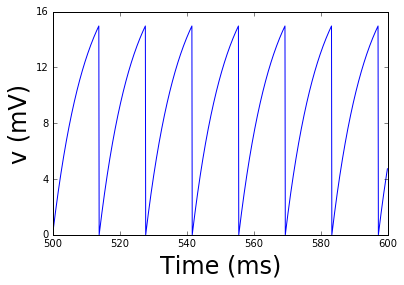

In [17]:

N = 1 # number of neurons
tau_m = 10 * ms # membrane time constant

v_r = 0 * mV # reset potential

v_th = 15 * mV # threshold potential

I_c = 20 * mV # constant input current



eqs = '''

dv/dt = -(v-I)/tau_m : volt

I : volt
'''

lif = NeuronGroup(N, model=eqs, threshold=v_th, reset=v_r)

# You can add randomness in initial membrane potential by changing the following line

lif.v = v_r * mV + 0 * mV * rand(len(lif))

lif.I = I_c



spikes = SpikeMonitor(lif)

v_trace = StateMonitor(lif, 'v', record=True)


run(0.1*second)

figure(1)

plot(v_trace.times/ms,v_trace[0]/mV)

xlabel('Time (ms)', fontsize=24)

ylabel('v (mV)',fontsize=24)

yticks([0,4,8,12,16])

show()

# plot the f-I curve for a LIF neuron with constant input

WARNING    /Users/codetesting/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in divide
 [py.warnings]
WARNING    /Users/codetesting/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log
 [py.warnings]
WARNING    /Users/codetesting/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in log
 [py.warnings]
WARNING    /Users/codetesting/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in divide
 [py.warnings]
WARNING    /Users/codetesting/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log
 [py.warnings]
WARNING    /Users/codetesting/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in log
 [py.warnings]


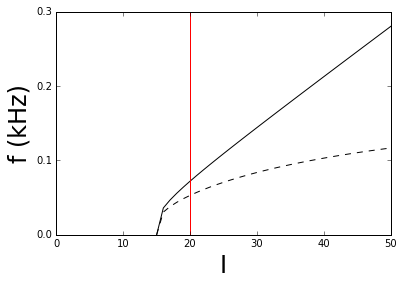

In [19]:
delta_abs = 5

tau_m = 10

v_th = 15

Is = linspace(0,50,51)

f1 = 1.0 / (0 + tau_m * log(Is/(Is - v_th)))

f2 = 1.0 / (delta_abs + tau_m * log(Is/(Is - v_th)))


figure(2)

plot(Is,f1,'k-')

plot(Is,f2,'k--')

plot([20, 20],[0, 0.3],'r-')

xlabel('I',fontsize=24)

ylabel('f (kHz)',fontsize=24)

yticks([0,.1,.2,.3])

show()

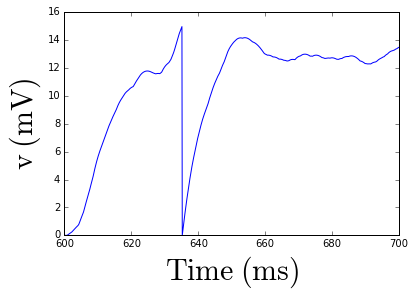

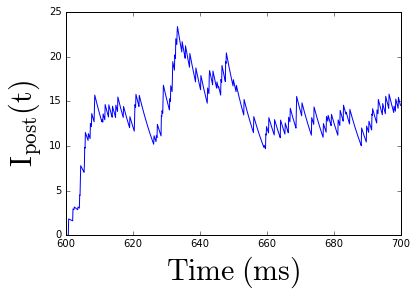

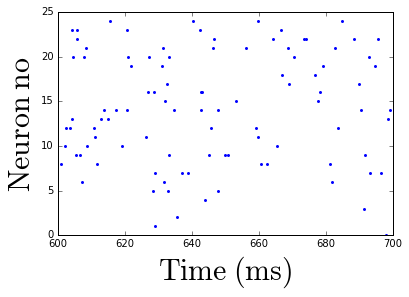

In [20]:
from brian.library.synapses import alpha_synapse

from brian.library.IF import leaky_IF

N_pre = 25 # number of presynaptic neurons
N_post = 1 # number of postsynaptic neurons

tau_m = 10 * ms # membrane time constant
v_r = 0 * mV # reset potential
v_th = 15 * mV # threshold potential
W = 1.62 * mV + 0.5*randn(N_pre,N_post) * mV # synaptic efficacies

# Leaky IF neuron with alpha synapses
eqs = leaky_IF(tau=tau_m,El=v_r)+Current('I=ge:mV')+\
alpha_synapse(input='I_in',tau=10*ms,unit=mV,output='ge')

lif_pre = PoissonGroup(N_pre, rates=40*Hz)
lif_post = NeuronGroup(N_post, model=eqs, threshold=v_th, reset=v_r)
C = Connection(lif_pre, lif_post, 'ge', weight=W)

spikes_pre = SpikeMonitor(lif_pre)
spikes_post = SpikeMonitor(lif_post)
v_trace = StateMonitor(lif_post, 'vm', record=True)
I_trace = StateMonitor(lif_post, 'ge', record=True)

run(0.1*second)

figure(1)
plot(v_trace.times/ms,v_trace[0]/mV)
xlabel('$\mathrm{Time \; (ms)}$',fontsize=30)
ylabel('$\mathrm{v \; (mV)}$',fontsize=30)

figure(2)
plot(I_trace.times/ms,I_trace[0]/mV)
xlabel('$\mathrm{Time \; (ms)}$',fontsize=30)
ylabel('$\mathrm{I_{post}(t)}$',fontsize=30)

figure(3)
raster_plot(spikes_pre)
xlabel('$\mathrm{Time \; (ms)}$',fontsize=30)
ylabel('$\mathrm{Neuron \; no}$',fontsize=30)
show()